In [ ]:
!pip install pandas numpy matplotlib seaborn plotly


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_with_totalprice.csv to sales_data_with_totalprice.csv


In [ ]:
import zipfile
import io

sales_df = pd.read_csv("sales_data_with_totalprice.csv")

# Read 'customers.csv' from 'customer.csv.zip' using zipfile module
with zipfile.ZipFile("customer.csv.zip", 'r') as zf:
    with zf.open("customers.csv") as customer_file:
        customer_df = pd.read_csv(customer_file, low_memory=False)

In [ ]:
print(uploaded.keys())

dict_keys(['sales_data_with_totalprice.csv'])


In [ ]:
# Convert date column
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

# Drop duplicates
sales_df = sales_df.drop_duplicates()
customer_df = customer_df.drop_duplicates()

# Handle missing values
sales_df = sales_df.fillna({"Quantity": 0, "UnitPrice": 0})
customer_df = customer_df.fillna("Unknown")

# Add Total price
sales_df["TotalPrice"] = sales_df["Quantity"] * sales_df["UnitPrice"]

print("Cleaned Sales Data:")
sales_df.head()


Cleaned Sales Data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,White Hanging Heart T-Light Holder,6,2023-01-10 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,White Metal Lantern,6,2023-01-10 08:26:00,3.39,17850,United Kingdom,20.34
2,536366,84406B,Cream Cupid Hearts Coat Hanger,8,2023-01-11 09:00:00,2.75,13047,United Kingdom,22.00
3,536367,84029G,Knitted Union Flag Hot Water Bottle,6,2023-01-11 09:05:00,3.39,12583,France,20.34
4,536367,84029E,Red Woolly Hottie White Heart.,6,2023-01-11 09:05:00,3.39,12583,France,20.34


In [ ]:
print("Basic Statistics of Sales Amount:")
sales_df["TotalPrice"].describe()


Basic Statistics of Sales Amount:


,TotalPrice
count,20.000000
mean,18.551000
std,8.096392
min,8.050000
25%,11.100000
50%,18.750000
75%,22.237500
max,37.500000


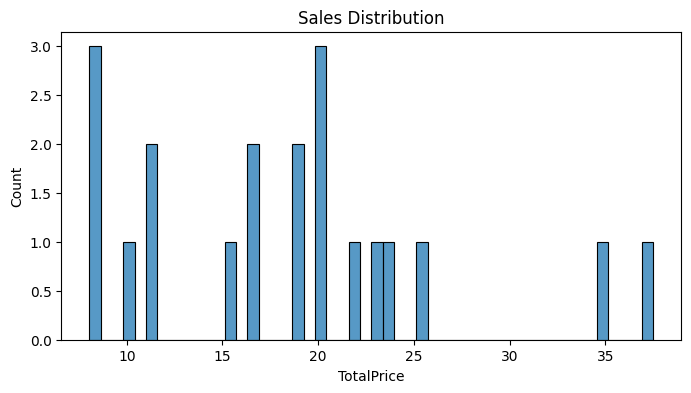

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(sales_df["TotalPrice"], bins=50)
plt.title("Sales Distribution")
plt.show()


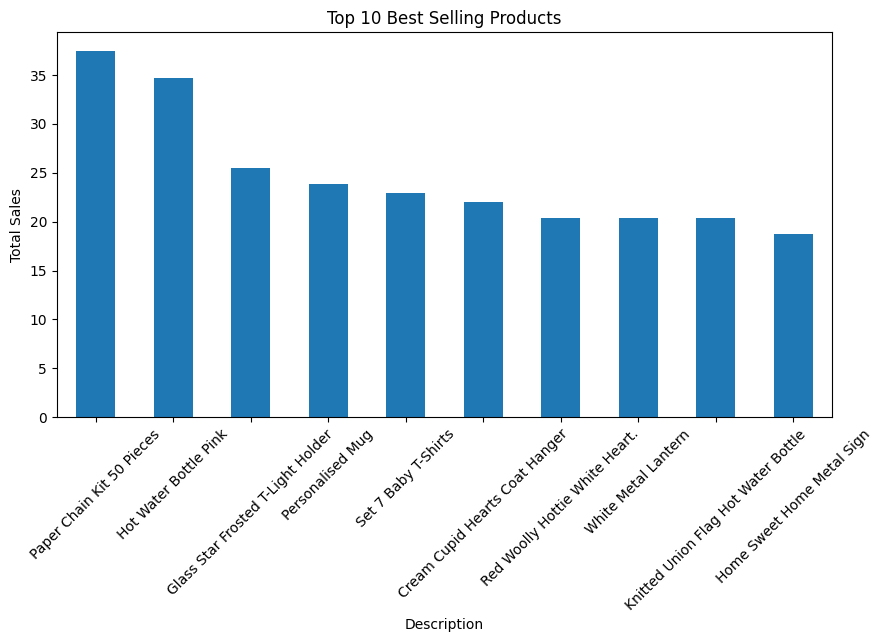

In [ ]:
top_products = sales_df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Best Selling Products")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


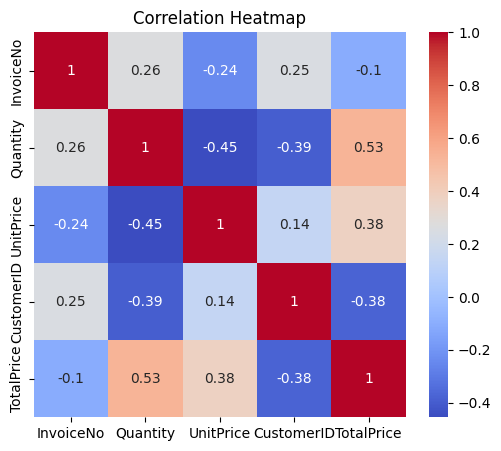

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(sales_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

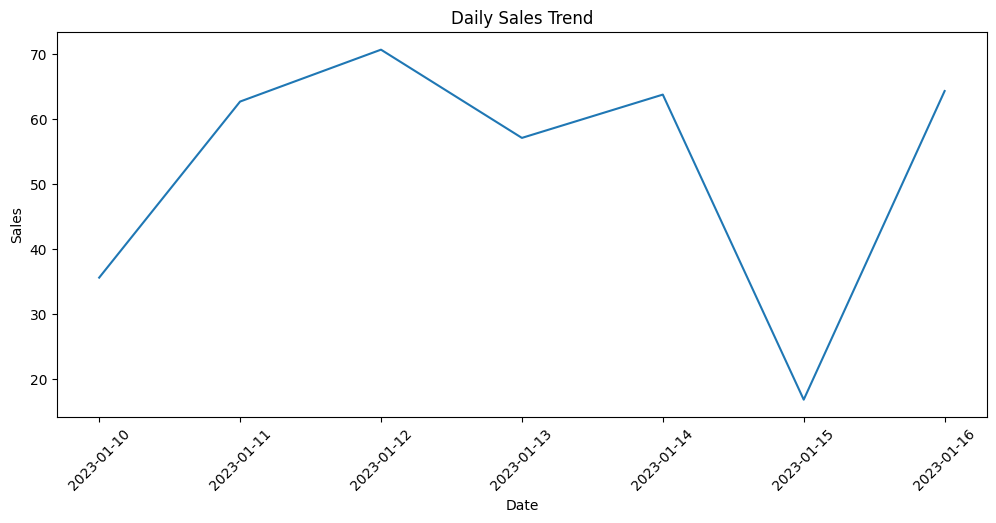

In [ ]:
daily_sales = sales_df.groupby(sales_df["InvoiceDate"].dt.date)["TotalPrice"].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


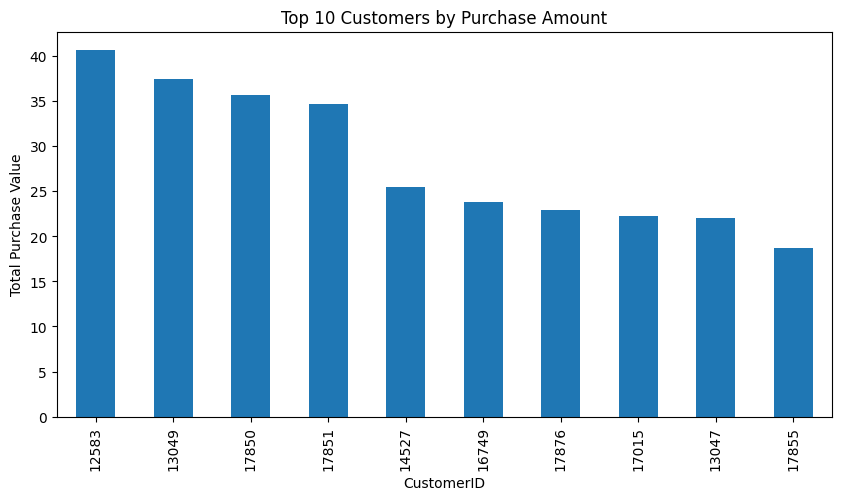

In [ ]:
top_customers = sales_df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Purchase Amount")
plt.ylabel("Total Purchase Value")
plt.show()


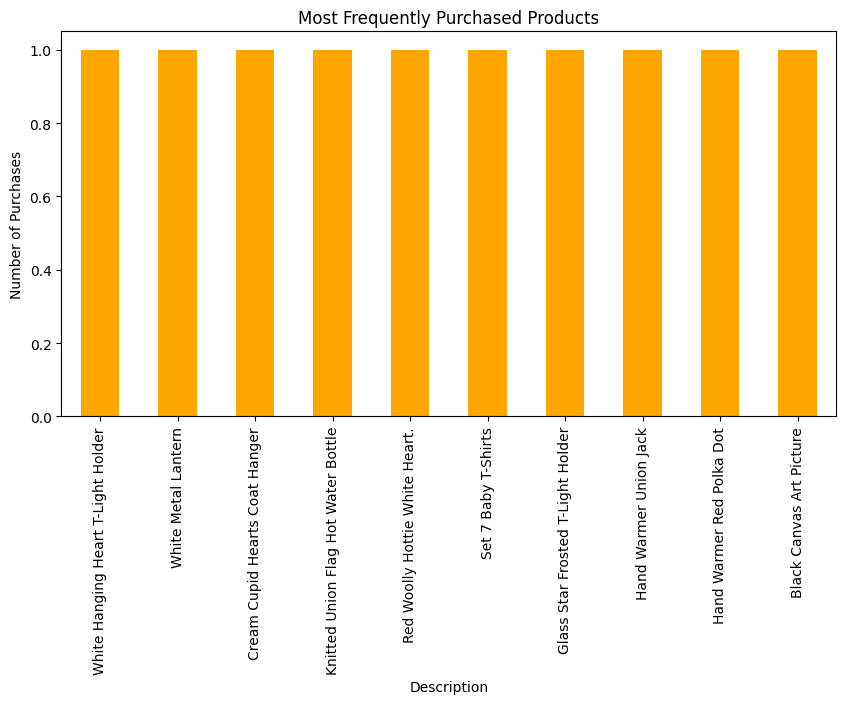

In [ ]:
product_freq = sales_df["Description"].value_counts().head(10)

plt.figure(figsize=(10,5))
product_freq.plot(kind="bar", color="orange")
plt.title("Most Frequently Purchased Products")
plt.ylabel("Number of Purchases")
plt.show()


In [ ]:
print("📌 Business Recommendations Based on EDA\n")

# 1. Best-selling products
print("Top 5 Products to Focus On:")
print(top_products.head(5), "\n")

# 2. Loyal customers
print("Top 5 Loyal Customers:")
print(top_customers.head(5), "\n")

# 3. Suggested actions
print("Suggested Business Actions:\n")
print("1. Advertise and bundle top-performing products.")
print("2. Give loyalty rewards to returning customers.")
print("3. Improve stock of frequently purchased items.")
print("4. Provide discounts in low-sales periods (identified in time-series).")
print("5. Use customer segmentation for personalized marketing.")


📌 Business Recommendations Based on EDA

Top 5 Products to Focus On:
Description
Paper Chain Kit 50 Pieces            37.50
Hot Water Bottle Pink                34.65
Glass Star Frosted T-Light Holder    25.50
Personalised Mug                     23.80
Set 7 Baby T-Shirts                  22.95
Name: TotalPrice, dtype: float64 

Top 5 Loyal Customers:
CustomerID
12583    40.68
13049    37.50
17850    35.64
17851    34.65
14527    25.50
Name: TotalPrice, dtype: float64 

Suggested Business Actions:

1. Advertise and bundle top-performing products.
2. Give loyalty rewards to returning customers.
3. Improve stock of frequently purchased items.
4. Provide discounts in low-sales periods (identified in time-series).
5. Use customer segmentation for personalized marketing.
